# Chapter08 표본분포와 통계적 추정

- <a href="#8.1모집단과표본">8.1 모집단과 표본</a>
- <a href="#8.2모평균의추정">8.2 모평균의 추정</a>
- <a href="#8.3모비율의추정">8.3 모비율의 추정</a>

In [1]:
# 공통으로 사용하는 라이브러리 가져오기
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (4,3)
plt.rcParams['font.family'] = 'Malgun Gothic'  # '맑은 고딕'으로 설정 
plt.rcParams['axes.unicode_minus'] = False     # 그래프에서 (-)숫자표시

### Numpy 균등분포 & 정규분포

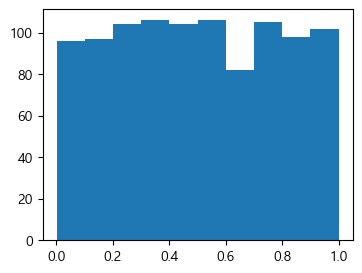

In [2]:
data = np.random.uniform(0,1,1000) # 균등분포(평균, 표준편차, 개수)
plt.hist(data)
plt.show()

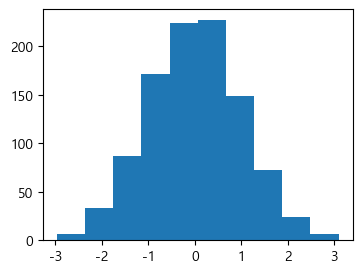

In [3]:
data = np.random.normal(0,1,1000) # 정규분포(평균, 표준편차, 개수)
plt.hist(data)
plt.show()

---------------------

## <a name="8.1모집단과표본">8.1 모집단과 표본</a>

### 모집단 분포와 표본분포

### [실습] 예제 8-1: 모수 구하기 (모평균, 모분산, 모표준편차 )
경부고속도로 서울 요금소~ 부산 구서 나들목에 있는 34개의 나들목 사이의 거리 측정 결과(소수점 셋째자리에서 반올림)

In [10]:
#방법1 : 수학식 사용
data =[9.59, 4.62, 0.65, 7.75, 16.98, 11.78, 7.24, 10.15, 25.49, 11.44, 10.37,
    9.33, 15.04, 12.16, 16.63, 12.06, 9.70, 12.46, 8.05, 19.91, 5.58, 12.48,
    4.35, 16.41, 22.53, 17.56, 18.4, 10.86, 27.43, 7.39, 14.57, 11.92, 2.00]  

mu =  sum(data)/len(data) # 모평균
S2 =  1/len(data) * sum((i - mu)**2 for i in data) # 모분산
S  =  S2**(1/2) # 모표준편차

print(f'a. 모평균   : {round(mu, 2)}')
print(f'b. 모분산   : {round(S2, 2)}')   # ddof=0 --> n, #ddof=1 --> (n-1)  'delta degrees of freedom'
print(f'c. 모표준편차: {round(S, 2)}')   # ddof=0

a. 모평균   : 12.21
b. 모분산   : 37.35
c. 모표준편차: 6.11


In [5]:
#방법2 : numpy 사용
import numpy as np

data =[9.59, 4.62, 0.65, 7.75, 16.98, 11.78, 7.24, 10.15, 25.49, 11.44, 10.37,
    9.33, 15.04, 12.16, 16.63, 12.06, 9.70, 12.46, 8.05, 19.91, 5.58, 12.48,
    4.35, 16.41, 22.53, 17.56, 18.4, 10.86, 27.43, 7.39, 14.57, 11.92, 2.00]  

mu =  np.mean(data) # 모평균
S2 =  np.var(data) # 모분산
S  =  np.std(data) # 모표준편차

print(f'a. 모평균   : {round(mu, 2)}')
print(f'b. 모분산   : {round(S2, 2)}')   # ddof=0 --> n, #ddof=1 --> (n-1)  'delta degrees of freedom'
print(f'c. 모표준편차: {round(S, 2)}')   # ddof=0

a. 모평균   : 12.21
b. 모분산   : 37.35
c. 모표준편차: 6.11


### [실습] 예제 8-2 : 표본 통계량 구하기
sample = 7.75, 9.70, 10.86

In [11]:
# 방법1 : 수학식 사용
sample = [7.75, 9.70, 10.86]
x_ =  sum(sample)/len(data)
print(f'a. 표본평균   : {round(x_, 2)}')

S2 =  1/len(sample) * sum((i - x_)**2 for i in sample)
print(f'a. 표본분산   : {round(S2, 2)}')

S =  S2**(1/2)
print(f'a. 표본표준편차: {np.round(S, 2)}')

a. 표본평균   : 0.86
a. 표본분산   : 75.24
a. 표본표준편차: 8.67


In [6]:
# 방법2 : numpy 사용
import numpy as np

sample = [7.75, 9.70, 10.86]
 
mu =  np.mean(sample) 
S2 =  np.var(sample) 
S  =  np.std(sample)

print(f'a. 표본평균   : {round(mu, 2)}')
print(f'b. 표본분산   : {round(S2, 2)}')   # ddof=0 --> n, #ddof=1 --> (n-1)  'delta degrees of freedom'
print(f'c. 표본표준편차: {round(S, 2)}')   # ddof=0
 

a. 표본평균   : 9.44
b. 표본분산   : 1.65
c. 표본표준편차: 1.28


#### data에서 임의로 3개 추출(비복원 추출)

### 표본평균의 분포 - 이산균등분포

#### # 경우의 수 : n=2인 표본평균의 경우의 수

In [ ]:
import itertools

n = 2
result = list(itertools.product(([1,2,3,4]), repeat=n)) # 복원추출
print("**경우의 수 : %s개" % len(result))
print(result)

#### # x_set: 확률변수 상태공간 (표본 평균 X_ 가 취할 수 있는 모든 값)

In [ ]:
x_set = [ sum([j for j in i])/n for i in result] 
x_set = list(set(x_set))
x_set.sort()
x_set

#### 확률질량함수: f(x)

In [ ]:
def f(x):
    cnt = 0
    for i in result:
        if sum([j for j in i])/n == x:
            cnt += 1
    return cnt / (len(result))

#### 확률변수: X

In [ ]:
X = [x_set, f]

#### 확률: P(prob)

In [ ]:
prob = [f(x_k) for x_k in x_set]
prob

#### 확률분포표 

In [ ]:
df = pd.DataFrame([prob], columns=x_set, index=['P(X_=x_)'])
df.columns.names = ['X_']
df

#### 평균의 기대값

In [ ]:
def E(X):
    x_set, f = X
    return np.sum([x_k * f(x_k) for x_k in x_set]) 

E(X)

#### 표본평균의 분산

In [ ]:
def V(X):
    x_set, f = X
    mean = E(X)
    return np.sum([(x_k - mean)**2 * f(x_k) for x_k in x_set])

V(X)

#### 이항균등분포의 표본평균의 분포 그래프로 나타내기

In [ ]:
def get_sample_dist(X, n):
    
    import itertools
    result = list(itertools.product((X), repeat=n)) # 복원추출
    print(f'**경우의 수 : {len(result)}개')
    print(f'**모든 경우 : {result}')


    # 확률변수 상태공간
    x_set = [ sum([j for j in i])/n for i in result] 
    x_set = list(set(x_set))
    x_set.sort()
#     print(f'**모든 확률변수 : {x_set}')

    # 확률질량함수
    def f(x):
        cnt = 0
        for i in result:
            if sum([j for j in i])/n == x:
                cnt += 1
        return cnt / (len(result))

    prob = [f(x_k) for x_k in x_set]
#     print(f'**모든 확률   : {prob}')


    # 확률분포표
    df = pd.DataFrame([prob], columns=x_set, index=['P(X_=x_)'])
    df.columns.names = ['X_']
    print(f'**확률분포표:\n/{df}')

    return x_set, prob, df


#---------------------
# 그래프로 나타내기 
#---------------------
plt.figure(figsize=(10,6))

X = [1,2,3,4]
for idx, x in enumerate(X): 
    print(f'[-- X={x} --]')
    x_set, prob, df = get_sample_dist(X, x)
    print('-'*50)

    plt.subplot(2, 2, idx+1) 
    plt.plot(x_set, prob, 'o-')
    plt.title(f'n={n}')
    
plt.show() 

### [실습] 예제 8-4 : 표본평균의 분포 및 확률 구하기
$N(178, 16)$인 모집단에서 크기 9인 표본 선정, 표본평균 $ \bar{X}$
- a. $\bar{X}$ 분포
- b. $P(\bar{X} \le 180)$ 
- c. $P(176 \le \bar{X} \le 180)$


In [ ]:
import scipy as sp

mu, var, n =  

print(f'a. 𝑋_분포 : 𝑋_ ~ N({mu, var/n}) ')





#### [실습] $N(166, 9)$인 모집단에서 크기 16인 표본 선정, 표본평균 $ \bar{X}$
- a. $\bar{X}$ 분포
- b. $P(\bar{X} \le 180)$ 
- c. $P(176 \le \bar{X} \le 180)$


### [실습] 예제 8-5 : 표본비율의 분포 및 확률 구하기
$p=0.45$인 모집단에서 크기 100인 표본 선정, 표본비율 $ \hat{p}$
- a. $ \hat{p}$ 분포
- b. $P(\hat{p} \le 0.35)$ 
- c. $P(0.41 \le \hat{p} \le 0.51)$

In [ ]:
import scipy as sp

n, p, q = 



#### [실습] 𝑝=0.45 인 모집단에서 크기 200인 표본 선정, 표본비율 𝑝̂ 
- a. $ \hat{p}$ 분포
- b. $P(\hat{p} \le 0.35)$ 
- c. $P(0.41 \le \hat{p} \le 0.51)$


----------------------------------------------------------

## <a name="8.2모평균의추정">8.2 모평균의 추정</a>

### 모평균의 점추정

In [ ]:
import numpy as np

data = [17.4, 17.2, 18.1, 17.5, 17.7,
       17.6, 17.5, 17.1, 17.8, 17.6]
N = np.array(data)

print(f'a. 표본평균   : {round(N.mean(), 4)}')
print(f'a. 표본분산   : {round(N.var(ddof=1), 4)}')
print(f'a. 표본표준편차: {round(N.std(ddof=1), 4)}')

### 모평균의 신뢰구간
**모분산이 알려진 정규모집단의 모평균에 대한 신뢰구간**

### [실습] 예제 8-7 : 모분산이 알려진 정규모집단의 신뢰구간

In [ ]:
Z = {90:1.645, 95:1.96, 99:2.58}

In [ ]:
n, x_, var =  
print(f'n, x_, var : {n, x_, var}')

a =  
b =  
print(f'모평균의 신뢰구간 : {a} <= mu <= {b}')

**모분산이 알려지지 않은 정규모집단의 신뢰구간(근사확률분포)**

### [실습] 예제 8-8 : 모분산이 알려지지 않은 정규모집단의 신뢰구간

In [ ]:
n, x_, sigma =  
print(f'n, x_, sigma : {n, x_, sigma}')

 
a =   
b =     
print(f'모평균의 신뢰구간 : {round(a,2)} <= mu <= {round(b,2)}')

### [실습] 예제 8-9 : 두 모평균 차의 신뢰구간

In [ ]:
n, x_, sigma1 =  
m, y_, sigma2 =  
print(f'n, x_, sigma1 : {n, x_, sigma1}')
print(f'm, y_, sigma2 : {m, y_, sigma2}')

a =   
b =  
print(f'두 모평균 차의 신뢰구간 : {round(a,2)} <= x_ - y_ <= {round(b,2)}')

----------------------------------------------------------

## <a name="8.3모비율의추정">8.3 모비율의 추정</a>

### 모비율의 신뢰구간

### [실습] 예제 8-10 : 모비율의 신뢰구간

In [ ]:
Z = {90:1.645, 95:1.96, 99:2.58}

n, p, q =  
print(f'n, p, q : {n, p, q}')

a =  
b =  
print(f'모비율의 신뢰구간 : {round(a, 2)} <= p^ <= {round(b, 2)}')

### [실습] 예제 8-11 : 두 모비율 차의 신뢰구간

In [ ]:
n, m  =  
p1,p2 =  
q1,q2 =  
print(f'n, p1, q1 : {n, p1, q1}')
print(f'm, p2, q2 : {n, p2, q2}')

a =  
b =  
print(p1-p2)
print(Z[95] * np.sqrt((p1*q1)/n + (p2*q2)/m))
print(f'두 모비율 차의 신뢰구간 : {round(a,4)} <= p1-p2 <= {round(b,4)}')

----------------------------------------------------------

끝